In [1]:
sys.path.insert(0, './common')

import sys
import wave
import qlearning_target_model

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [13]:
env = wave.WaveEnv(env_path, timescale=30, worker_id=22)

WAVE environment created.


In [14]:
model = qlearning_target_model.QLearning(127, 2, 512)

In [15]:
save_path = './results/env01/qlearning_target/512-final-new-decay-more-new1'
model.set_model_save_path(save_path)

In [5]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


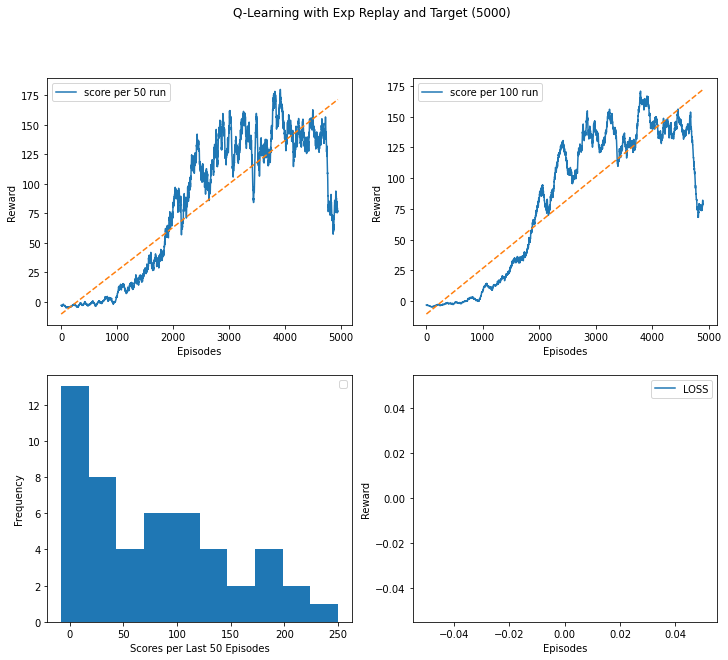

Model saved
Training history saved
saved to ./results/env01/qlearning_target/512-final-new-decay-more-new1
EPOCH: 4999, total reward: 13.729988098144531, timestep: 226, epsilon: 0.009998671593271896, lr: 1.350851717672993e-05


In [16]:
model.set_train_params(max_step=1000, batch_size=512, start_epsilon=1, mem_size=1_000_000, min_epsilon=0.01, lr_decay_interval=250)
model.train(env, 5000, show_plot=True)

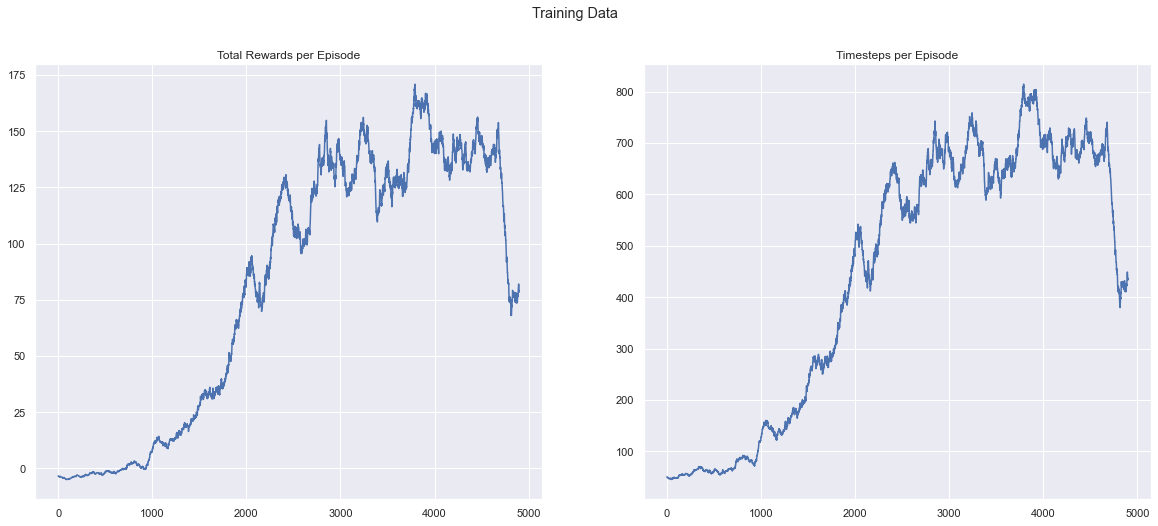

In [17]:
model.plot_train_memory(smooth=100)

In [8]:
model.save_model()

Model saved
Training history saved


In [18]:
env = wave.WaveEnv(env_path, 1)
model.test(env)

WAVE environment created.


UnityCommunicatorStoppedException: Communicator has exited.

In [25]:
len(model.experiences)

100000

In [23]:
env = wave.WaveEnv(env_path)
model.test_avg(env, 10)

WAVE environment created.
10.009998127818108 100
186.19997318089008 776
204.99996973574162 1000
155.88997930288315 983
-2.48000206053257 150
156.04997530579567 779
194.99997727572918 1000
184.99997575581074 1000
66.97999294102192 461
18.859996005892754 223


([10.009998127818108,
  186.19997318089008,
  204.99996973574162,
  155.88997930288315,
  -2.48000206053257,
  156.04997530579567,
  194.99997727572918,
  184.99997575581074,
  66.97999294102192,
  18.859996005892754],
 [100, 776, 1000, 983, 150, 779, 1000, 1000, 461, 223],
 117.65098355710506,
 647.2)

In [ ]:
# qlearning 10,000 episode (386.0179519353807, 1598.09)

In [22]:
env.close()